# modellin : creating and not trainign

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from testCases_v4a import *
#np.random.seed(1)

In [2]:
def initialize_parameters_deep(dims):
  L = len(dims)
  param = {}
  #np.random.seed(1)
  for l in range(1,L):
    param["W"+str(l)] = np.random.randn(dims[l],dims[l-1]) / np.sqrt(dims[l-1])# *0.25
    param["b"+str(l)] = np.zeros((dims[l],1))
    
    assert(param["W"+str(l)].shape == (dims[l],dims[l-1]))
    assert(param["b"+str(l)].shape == (dims[l],1) )

  return param

In [3]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.70283725 -0.39781173  0.1568277   0.17741739  0.4286787 ]
 [ 0.0664099  -0.6541273   0.55545104  0.97620163  0.04522636]
 [ 0.00208415 -0.11465159  0.16447382 -0.57177977 -0.26879908]
 [ 0.07230073 -0.61012281  0.59773316  0.46669025 -0.07378312]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.40905339  0.62891384  0.10043102 -0.16022318]
 [-0.30229074  0.26197747  0.17408206 -0.69992401]
 [ 0.25240957  0.31178319 -0.56017809  0.48264223]]
b2 = [[0.]
 [0.]
 [0.]]


In [4]:
def linear_forward(A,W,b):
  out = np.dot(W,A) + b
  assert(out.shape == (W.shape[0] , A.shape[1]))
  cache = (A,W,b)
  return out , cache

In [5]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


```
Z = [[ 3.26295337 -1.23429987]]
```

In [6]:
def sigmoid(Z):
  Z_copy = np.array(Z,copy=True)
  A = 1 / (1+np.exp(-Z_copy))
  assert(Z_copy.shape == A.shape)
  cache = Z_copy
  return A , cache

In [7]:
def relu(Z):
  Z_copy = np.array(Z,copy=True)
  A = np.maximum(0,Z_copy)
  assert(A.shape == Z_copy.shape)
  cache = Z_copy
  return A , cache

In [8]:
def sigmoid_backward(dA , cache ):
  Z = cache
  s = 1 / (1 + np.exp(-Z))
  dZ = dA * s *(1-s)

  assert(dZ.shape == Z.shape)
  return dZ

In [9]:
def relu_backward(dA , cache):
  Z = cache

  dZ = np.array(dA,copy= True)
  dZ[Z<=0] = 0
  assert(dZ.shape == Z.shape)
  return dZ

In [10]:
def linear_activation_forward(A_prev,W,b,activation):
  if activation == "sigmoid":
    Z , linear_cache = linear_forward(A_prev,W,b)
    A, activation_cache = sigmoid(Z)
  elif activation == "relu":
    Z , linear_cache = linear_forward(A_prev,W,b)
    A, activation_cache = relu(Z)
  else:
    raise("invalid activation")
  assert(A.shape == (W.shape[0],A_prev.shape[1]))
  cache = (linear_cache , activation_cache)
  return A , cache

In [11]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


```
With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]
```

In [12]:
def L_model_forward(X , param):
  L = len(param) // 2
  cache_list = []
  A_prev = X
  for l in range(1,L):
    A_ , cache = linear_activation_forward(A_prev,param["W"+str(l)],param["b"+str(l)],"relu")
    cache_list.append(cache)
    assert(A_.shape == (param["W"+str(l)].shape[0] ,A_prev.shape[1]))
    A_prev = A_
  A , cache = linear_activation_forward(A_prev,param["W"+str(L)],param["b"+str(L)],"sigmoid")
  cache_list.append(cache)
  assert(A.shape == (1 ,A_prev.shape[1]))
  return A , cache_list

In [13]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


```
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3
```

In [14]:
caches[0][1]

array([[-5.23825714,  3.18040136,  0.4074501 , -1.88612721],
       [-2.77358234, -0.56177316,  3.18141623, -0.99209432],
       [ 4.18500916, -1.78006909, -0.14502619,  2.72141638],
       [ 5.05850802, -1.25674082, -3.54566654,  3.82321852]])

In [15]:
def compute_cost(AL , Y):
  cost = np.sum(-Y*np.log(AL) - (1-Y)*np.log(1-AL)) / Y.shape[1]
  return cost

In [16]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793423


```
cost = 0.2797765635793422
```

In [17]:
def linear_backward(dZ,cache):
  m = dZ.shape[1]
  b = cache[2]
  A_prev = cache[0]
  W = cache[1]
  dW = (1/m) * np.dot(dZ,A_prev.T)
  dA_prev = np.dot(W.T,dZ)
  db = np.sum(dZ,axis=1,keepdims=True) *(1/ m)
  assert(dW.shape == W.shape)
  assert(db.shape == b.shape)
  assert(dA_prev.shape == A_prev.shape)
  return dA_prev , dW , db

In [18]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


```
dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]
```

In [19]:
def linear_activation_backward(dA , cache , activation):
  if activation == "sigmoid":
    dZ = sigmoid_backward(dA,cache[1])
  elif activation == "relu":
    dZ = relu_backward(dA,cache[1])
  else:
    raise("invalid activation")
  dA_prev , dW , db = linear_backward(dZ,cache[0])
  return dA_prev , dW , db

In [20]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


```
sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]
```

In [21]:
def L_model_backward(AL,Y,cache):
  dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))
  L = len(cache)
  Y = Y.reshape(AL.shape)
  grads = {}
  dA , dW , db = linear_activation_backward(dAL , cache[L-1] , "sigmoid")
  grads["dW"+str(L)] = dW
  grads["db"+str(L)] = db
  grads["dA"+str(L-1)] = dA
  for l in range(L-1,0,-1):
    dA , dW , db = linear_activation_backward(dA , cache[l-1] , "relu")
    grads["dW"+str(l)] = dW
    grads["db"+str(l)] = db
    grads["dA"+str(l-1)] = dA

  return grads

In [22]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


```
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]

```

In [23]:
def update_parameters(params , grads , alpha ):
  L = len(params) // 2
  for l in range(1,L+1):
    params["W"+str(l)] = params["W"+str(l)] - alpha * grads["dW"+str(l)]
    params["b"+str(l)] = params["b"+str(l)] - alpha * grads["db"+str(l)]
  return params

In [24]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


```
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
```

# data preprocessing 

In [25]:
train_dataset = h5py.File("datasets/train_catvnoncat.h5" , 'r')
test_dataset = h5py.File("datasets/test_catvnoncat.h5" , 'r')

In [26]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [27]:
images_train = np.array(train_dataset["train_set_x"])
labels_train = np.array(train_dataset["train_set_y"]).reshape(1,-1)
images_test = np.array(test_dataset['test_set_x'])
labels_test = np.array(test_dataset['test_set_y']).reshape(1,-1)

In [28]:
print(images_train.shape , labels_train.shape , images_test.shape , labels_test.shape ,sep ="\n")

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [29]:
X_train_m = images_train.T.reshape(-1,209)
X_test_m = images_test.T.reshape(-1,50)

In [30]:
X_train_ms = (X_train_m / 255.).astype("float32")
X_test_ms = (X_test_m / 255.).astype("float32")

In [31]:
def predict(X,Y,params):
  prob , cache = L_model_forward(X,params)
  assert(prob.shape == Y.shape)
  p = (prob>0.5) * 1
  temp = p == Y
  accuracy = np.sum(temp) / X.shape[1]
  print("accuracy:"+str(accuracy))
  return p

# training

In [32]:
%load_ext autoreload
%autoreload 2

In [33]:
def L_layer_model(X,Y,layers_dims  ,learning_rate= 0.0075,num_iterations=3000,print_cost = False):
  np.random.seed(1)
  costs = []
  L = len(layers_dims) -1
  parameters = initialize_parameters_deep(layers_dims)
  for i in range(num_iterations):
    AL , cache = L_model_forward(X,parameters)
    cost = compute_cost(AL , Y)
    costs.append(cost)
    grads = L_model_backward(AL,Y,cache)
    parameters = update_parameters(parameters,grads,learning_rate)
    if print_cost and i % 100 == 0:

      print(f"cost in {i} : "+str(cost))
      #p = predict(X,Y,parameters)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

In [34]:
layers_dims = (12288, 32, 16, 8, 4,2,1) #  4-layer model

cost in 0 : 0.6971897509880736


cost in 100 : 0.6758635873707902
cost in 200 : 0.6616700927366587
cost in 300 : 0.646454349866057
cost in 400 : 0.6281281111928654
cost in 500 : 0.6073258782729083
cost in 600 : 0.5724532157120807
cost in 700 : 0.5255284935619237
cost in 800 : 0.44785118130840834
cost in 900 : 0.3399781621722945
cost in 1000 : 0.24142626603799677
cost in 1100 : 0.1569495538598248
cost in 1200 : 0.4628462606809744
cost in 1300 : 0.06240274011425986
cost in 1400 : 0.027264100422024977
cost in 1500 : 0.016949370327288157
cost in 1600 : 0.011860060152316162
cost in 1700 : 0.008878245564977521
cost in 1800 : 0.006980049482509792
cost in 1900 : 0.005688239641037827
cost in 2000 : 0.004762279530472276
cost in 2100 : 0.004067416853015588
cost in 2200 : 0.003530292299170492
cost in 2300 : 0.003104652561707774
cost in 2400 : 0.0027551717381248055
cost in 2500 : 0.0024687108698638856
cost in 2600 : 0.002230946274303613
cost in 2700 : 0.0020315716358892686
cost in 2800 : 0.0018625283471315392
cost in 2900 : 0.0017

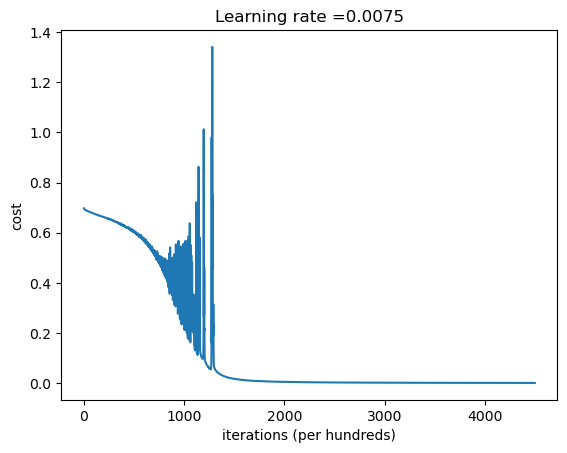

In [35]:
parameters = L_layer_model(X_train_ms,labels_train, layers_dims, num_iterations = 4500, print_cost = True)

In [36]:
p = predict(X_train_ms,labels_train,parameters)

accuracy:1.0


In [37]:
p = predict(X_test_ms,labels_test,parameters)

accuracy:0.74
